<a href="https://colab.research.google.com/github/alegomezri/Image-based-EEG-Representation/blob/main/Circus_plot_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.databases
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.visualizations.git
!apt-get install python3-matplotlib

In [ ]:
import numpy as np
import scipy.io as sio
import gcpds.databases as loaddb
from sklearn.cluster import KMeans
import matplotlib as mpl
from google.colab import drive
drive.mount('/content/drive')
from glob import glob
import os
import matplotlib.pyplot as plt
from pickle import load, dump
import pandas as pd
from gcpds.visualizations.connectivities import CircosConnectivity

In [ ]:
def grid_search_info(cv_results_):
  """
  Return the important information of the grid_search dictionary results
  INPUT
  -----
    1. cv_results_: (dict) grid_search.cv_results_ attribute
  OUTPUT
  ------
    2.
  """
  best_index = np.argwhere(cv_results_['rank_test_acc']==1)[0][0]
  best_params  = cv_results_['params'][best_index]
  mean_test_acc = np.round(cv_results_['mean_test_acc'][best_index]*100, 1)
  std_test_acc = np.round(cv_results_['std_test_acc'][best_index]*100, 1)
  mean_test_kappa = np.round(cv_results_['mean_test_kappa'][best_index], 2)
  std_test_kappa = np.round(cv_results_['std_test_kappa'][best_index], 2)
  mean_test_time = np.round(cv_results_['mean_score_time'][best_index], 4)
  std_test_time = np.round(cv_results_['std_score_time'][best_index], 4)
  mean_train_acc = np.round(cv_results_['mean_train_acc'][best_index]*100, 1)
  std_train_acc = np.round(cv_results_['std_train_acc'][best_index]*100, 1)
  mean_train_kappa = np.round(cv_results_['mean_train_kappa'][best_index], 2)
  std_train_kappa = np.round(cv_results_['std_train_kappa'][best_index], 2)
  mean_fit_time = np.round(cv_results_['mean_fit_time'][best_index], 4)
  std_fit_time = np.round(cv_results_['std_fit_time'][best_index], 4)
  return best_params, (mean_test_acc, std_test_acc, mean_test_kappa , std_test_kappa), (mean_train_acc, std_train_acc, mean_train_kappa , std_train_kappa), (mean_test_time, std_test_time), (mean_fit_time, std_fit_time )

In [ ]:
%cd
%cd /content/drive/MyDrive/Alejandra/PRUEBAS WDCNN/Results_Todos_Sujetos

/root
/content/drive/MyDrive/Alejandra/PRUEBAS WDCNN/Results_Todos_Sujetos


In [ ]:
list_result = glob('/content/drive/MyDrive/Alejandra/PRUEBAS WDCNN/Results_Todos_Sujetos')
results_dir = list_result
list(results_dir)
print(list_result)

['/content/drive/MyDrive/Alejandra/PRUEBAS WDCNN/Results_Todos_Sujetos']


In [ ]:
subjects = np.arange(52)+1
subjects = np.delete(subjects,[28,33])
results_dir = list_result

for f in results_dir:
  results = {'Subject':[], 'Test acc':[], 'Test kappa':[], 'Train acc':[], 'Train kappa':[],
           'Test Time':[],'Train Time':[], 'hidden_units':[], 'l1_l2':[], 'validation_split':[]}
  mean_test_acc = np.zeros(subjects.shape[0])
  mean_test_kappa= np.zeros(subjects.shape[0])
  mean_train_acc = np.zeros(subjects.shape[0])
  mean_train_kappa = np.zeros(subjects.shape[0])
  mean_test_time = np.zeros(subjects.shape[0])
  mean_fit_time = np.zeros(subjects.shape[0])
  for ind_sbj, sbj in enumerate(subjects):
    with open(f+'/grid_search_results/subject_'+str(sbj)+'.txt', 'rb') as fgd_res:
      gd_res = load(fgd_res) #grid_search results
    best_params, test_res, train_res, test_time, train_time = grid_search_info(gd_res)
    results['Subject'].append(sbj)
    results['Test acc'].append(str(test_res[0])+' +/- '+str(test_res[1]))
    mean_test_acc[ind_sbj] = test_res[0]
    results['Test kappa'].append(str(test_res[2])+' +/- '+str(test_res[3]))
    mean_test_kappa[ind_sbj] = test_res[2]
    results['Train acc'].append(str(train_res[0])+' +/- '+str(train_res[1]))
    mean_train_acc[ind_sbj] = train_res[0]
    results['Train kappa'].append(str(train_res[2])+' +/- '+str(train_res[3]))
    mean_train_kappa[ind_sbj] = train_res[2]
    results['Test Time'].append(str(test_time[0])+' +/- '+str(test_time[1]))
    mean_test_time[ind_sbj] = test_time[0]
    results['Train Time'].append(str(train_time[0])+' +/- '+str(train_time[1]))
    mean_fit_time[ind_sbj] = train_time[0]
    for param in best_params.keys():
      results[param].append(best_params[param])
  results['Subject'].append('avg')
  results['Test acc'].append(str(np.round(mean_test_acc.mean(),1))+' +/- '+str(np.round(mean_test_acc.std(),1)))
  results['Test kappa'].append(str(np.round(mean_test_kappa.mean(),2))+' +/- '+str(np.round(mean_test_kappa.std(),2)))
  results['Train acc'].append(str(np.round(mean_train_acc.mean(),1))+' +/- '+str(np.round(mean_train_acc.std(),1)))
  results['Train kappa'].append(str(np.round(mean_train_kappa.mean(),2))+' +/- '+str(np.round(mean_train_kappa.std(),2)))
  results['Test Time'].append(str(np.round(mean_test_time.mean(),4))+' +/- '+str(np.round(mean_test_time.std(),4)))
  results['Train Time'].append(str(np.round(mean_fit_time.mean(),4))+' +/- '+str(np.round(mean_fit_time.std(),4)))
  for param in best_params.keys():
    results[param].append(str(np.round(np.array(results[param]).mean(),5))+' +/- '+str(np.round(np.array(results[param]).std(),5)))
  results = pd.DataFrame.from_dict(results)
  results.to_csv(f+'.csv',index=False)
  print(f+'\n')
  print(results.to_markdown()+'\n')

/content/drive/MyDrive/Alejandra/PRUEBAS WDCNN/Results_Todos_Sujetos

|    | Subject   | Test acc      | Test kappa    | Train acc     | Train kappa   | Test Time         | Train Time        | hidden_units       | l1_l2               | validation_split   |
|---:|:----------|:--------------|:--------------|:--------------|:--------------|:------------------|:------------------|:-------------------|:--------------------|:-------------------|
|  0 | 1         | 72.5 +/- 3.9  | 0.45 +/- 0.08 | 98.9 +/- 1.8  | 0.98 +/- 0.04 | 0.2422 +/- 0.0079 | 4.2545 +/- 0.1617 | 800                | 0.001               | 0                  |
|  1 | 2         | 53.2 +/- 5.8  | 0.07 +/- 0.12 | 97.5 +/- 3.5  | 0.95 +/- 0.07 | 0.2717 +/- 0.1008 | 4.2498 +/- 0.2089 | 400                | 0.01                | 0                  |
|  2 | 3         | 89.5 +/- 4.3  | 0.79 +/- 0.09 | 99.9 +/- 0.2  | 1.0 +/- 0.0   | 0.2387 +/- 0.0058 | 4.2536 +/- 0.1923 | 1200               | 0.01                | 0               

In [ ]:
seed = 23
db = loaddb.GIGA_MI_ME('/content/drive/Shareddrives/GCPDS-Databases/GIGA-MI_ME')
subjects = np.arange(db.metadata['subjects']) + 1
subjects = np.delete(subjects,[28,33])
fs = db.metadata['sampling_rate']

In [ ]:
mean_test_acc = np.zeros((subjects.shape[0],1))
std_test_acc = np.zeros((subjects.shape[0],1))
mean_test_kappa= np.zeros((subjects.shape[0],1))
std_test_kappa= np.zeros((subjects.shape[0],1))

for ind_sbj, sbj in enumerate(subjects):
    with open(f+'/grid_search_results/subject_'+str(sbj)+'.txt', 'rb') as fgd_res:
      gd_res = load(fgd_res) #grid_search results
    _, test_res, train_res, _, _ = grid_search_info(gd_res)
    mean_test_acc[ind_sbj,0] = test_res[0]
    std_test_acc[ind_sbj,0] = test_res[1]
    mean_test_kappa[ind_sbj,0] = test_res[2]
    std_test_kappa[ind_sbj,0] = test_res[3]

score = np.concatenate([mean_test_acc, mean_test_kappa, std_test_acc, std_test_kappa], axis=1)

In [ ]:
reference = score #Media de acc, media de kappa, std de acc, std de kappa *sujetos (53)
idx_ord_sbj = np.argsort(reference[:,0])[::-1] #organiza los sujetos de forma desendiente de acuerdo al acc
n_groups = 3 #grupos
kmeans = KMeans(n_clusters=n_groups, random_state=seed).fit(reference) #los grupos estan basados en media y desviación estandar de acc y kappa del  modelo (GFC)
groups = np.argsort(kmeans.cluster_centers_[:,0])[::-1] #Se esta organizando en forma descente

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
n_groups #Número de grupos


3

In [ ]:
kmeans.labels_

array([0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2,
       1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0,
       0, 1, 0, 1, 2, 0], dtype=int32)

In [ ]:
sum(kmeans.labels_==0) #Grupo 1

22

In [ ]:
sum(kmeans.labels_==1) #Grupo 2

11

In [ ]:
sum(kmeans.labels_==2) #Grupo 3

17

In [ ]:
path = '/content/drive/Shareddrives/GFC + WDCNN/Conectividades/'
save_path= path+'GFC_laplacian_ALL'+'.mat'
C= sio.loadmat(save_path)['GFC']

In [ ]:
C.shape

(1, 50)

In [ ]:
C[0,0].shape

(200, 2016, 1, 4)

# Matriz por grupo


In [ ]:
channels = ['Fp1','Fpz','Fp2',
            'AF7','AF3','AFz','AF4','AF8',
            'F7','F5','F3','F1','Fz','F2','F4','F6','F8',
            'FT7','FC5','FC3','FC1','FCz','FC2','FC4','FC6','FT8',
            'T7','C5','C3','C1','Cz','C2','C4','C6','T8',
            'TP7','CP5','CP3','CP1','CPz','CP2','CP4','CP6','TP8',
            'P9','P7','P5','P3','P1','Pz','P2','P4','P6','P8','P10',
            'PO7','PO3','POz','PO4','PO8',
            'O1','Oz','O2',
            'Iz']
areas = {

    'Frontal': ['Fpz', 'AFz', 'Fz', 'FCz'],
    'Frontal Right': ['Fp2','AF4','AF8','F2','F4','F6','F8',],
    'Central Right': ['FC2','FC4','FC6','FT8','C2','C4','C6','T8','CP2','CP4','CP6','TP8',],
    'Posterior Right': ['P2','P4','P6','P8','P10','PO4','PO8','O2',],

    'Posterior': ['CPz','Pz', 'Cz','POz','Oz','Iz',],
    'Posterior Left': ['P1','P3','P5','P7','P9','PO3','PO7','O1',],

    'Central Left': ['FC1','FC3','FC5','FT7','C1','C3','C5','T7','CP1','CP3','CP5','TP7',],
    'Frontal Left': ['Fp1','AF3','AF7','F1','F3','F5','F7',],
}

# Grupo 1

In [ ]:
Ctotal=np.zeros((C.shape[1],2016,4))
for sbj in range(C.shape[1]):
   Ctotal[sbj,:,:]=(np.mean(C[0,sbj],axis=0)[:,0,:])
indx= kmeans.labels_== 0 #Grupo1
Ctotal_0=Ctotal[indx,:,:]
Ctotal_0= np.mean(Ctotal_0,axis=(0,2))
Ctotal_0.shape

(2016,)

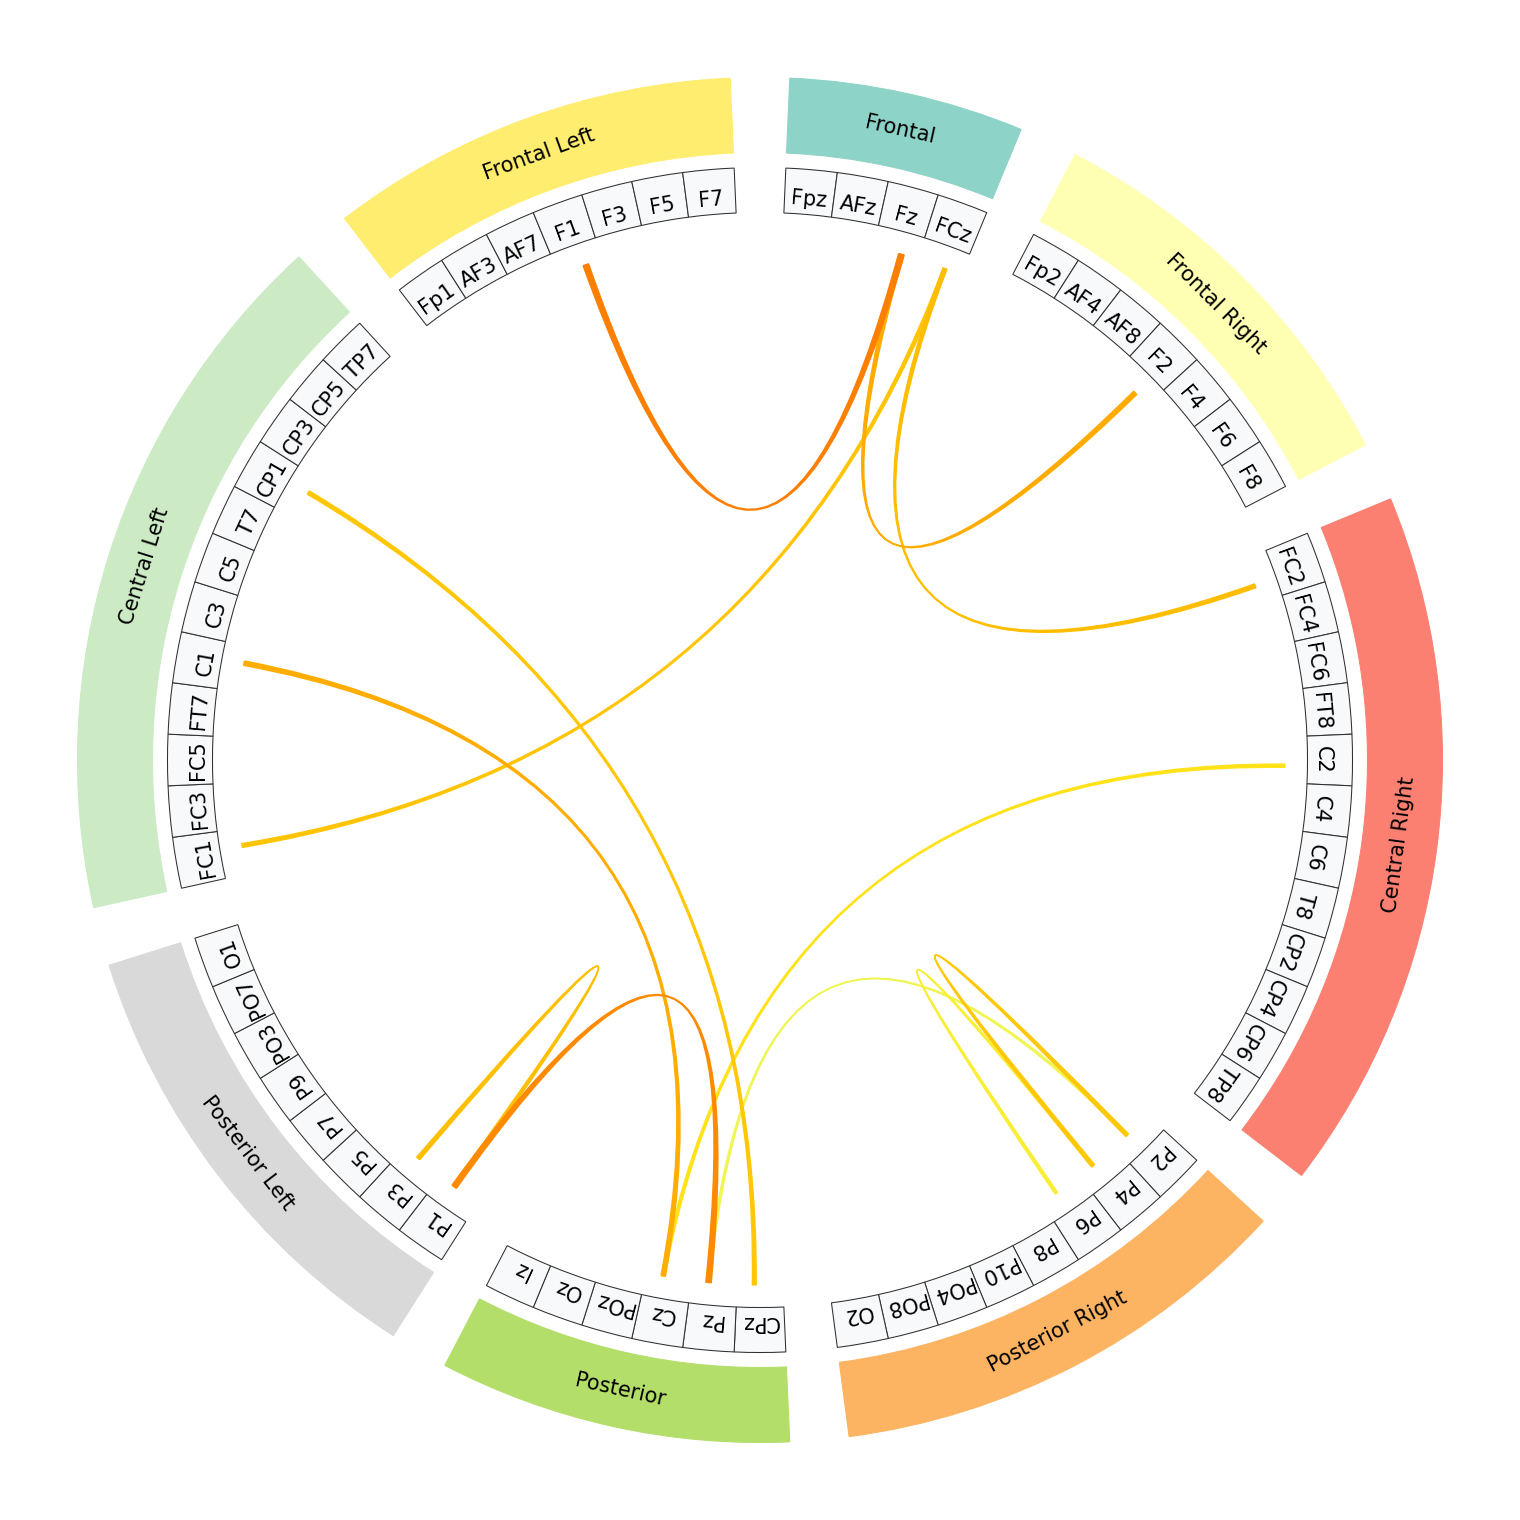

In [ ]:
conn = CircosConnectivity(
    Ctotal_0, channels, areas=areas, threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

# Grupo 2

In [ ]:
indx= kmeans.labels_== 1 #Grupo
Ctotal_1=Ctotal[indx,:,:]
Ctotal_1= np.mean(Ctotal_1,axis=(0,2))
Ctotal_1.shape

(2016,)

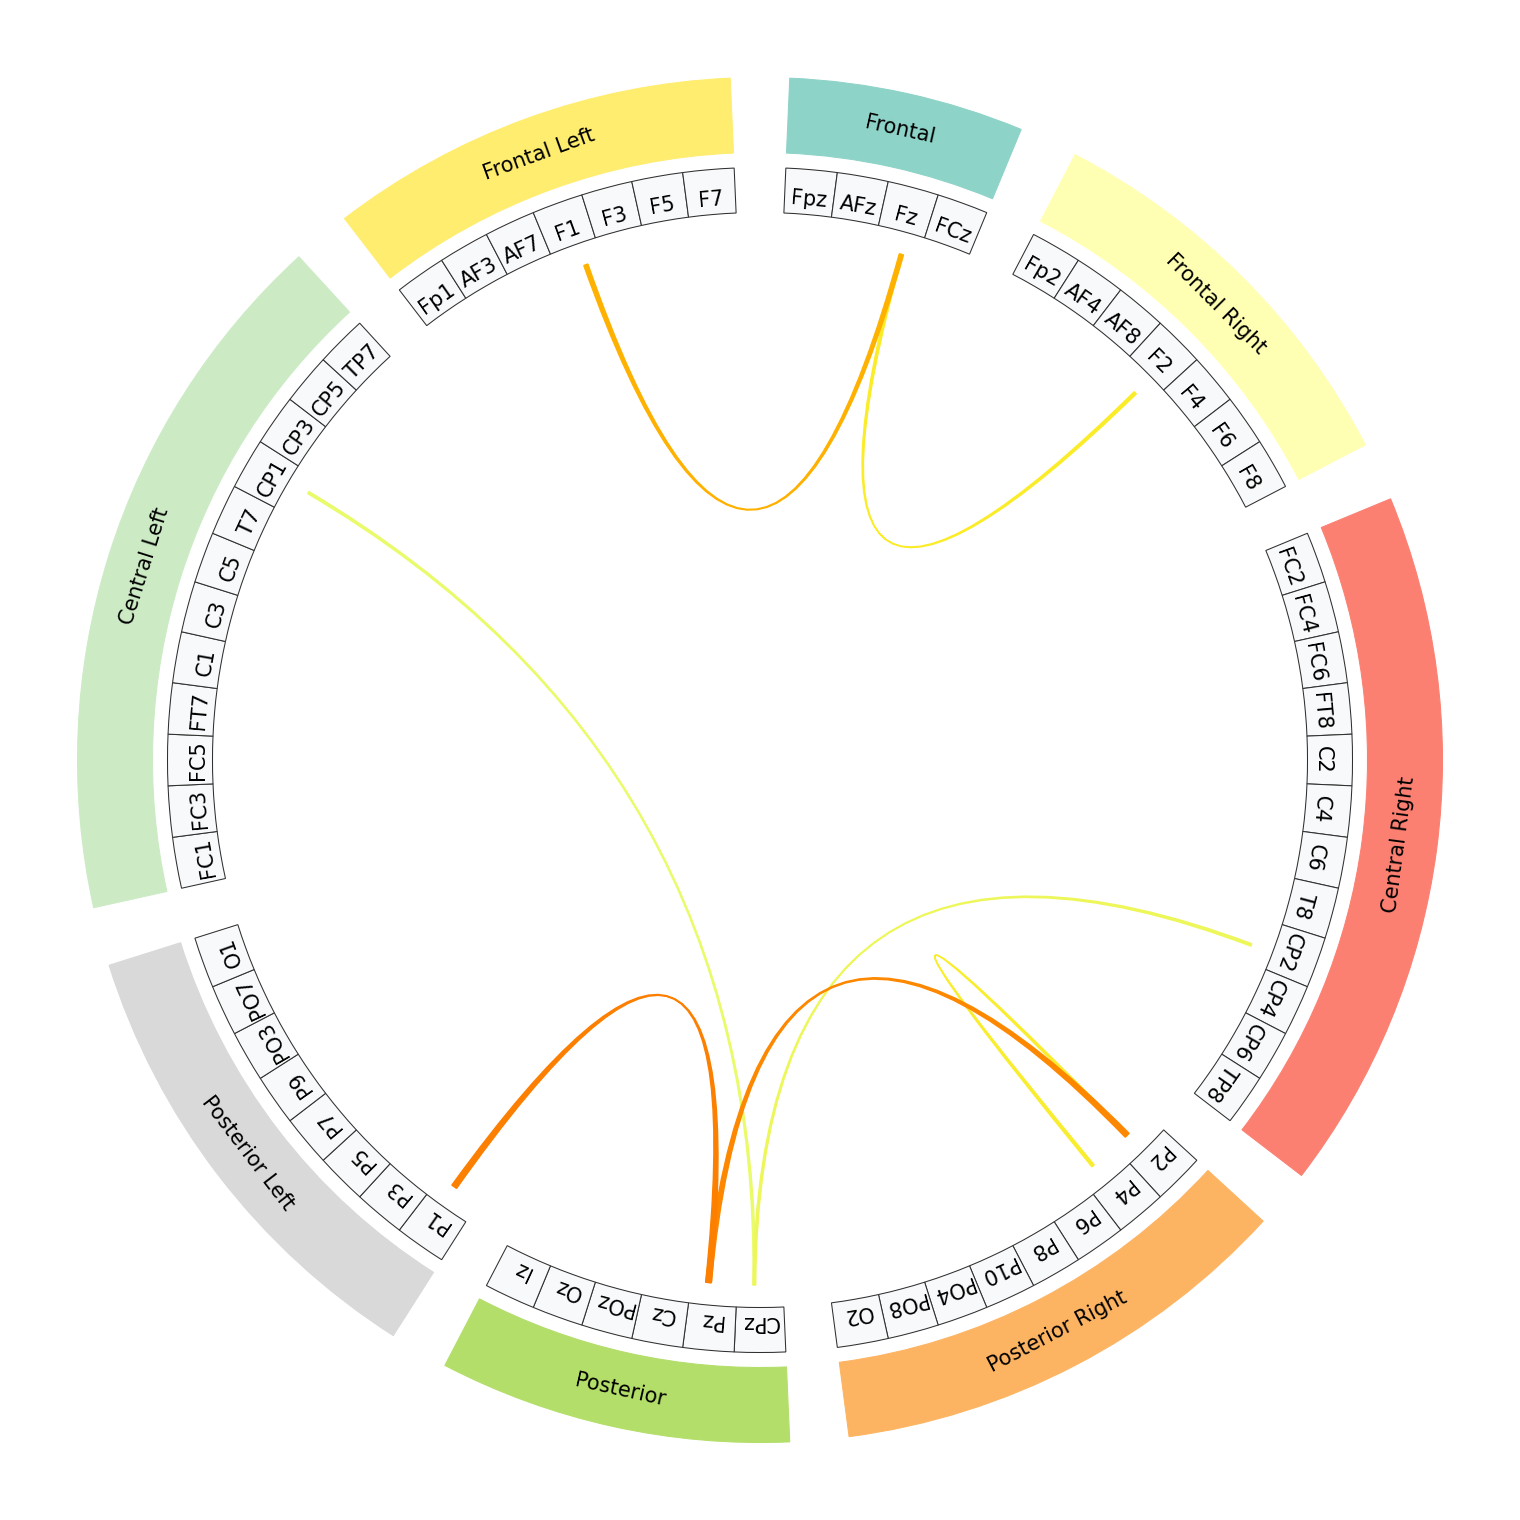

In [ ]:
conn = CircosConnectivity(
    Ctotal_1, channels, areas=areas, threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

# Grupo 3

In [ ]:
indx= kmeans.labels_== 2 #Grupo
Ctotal_2=Ctotal[indx,:,:]
Ctotal_2= np.mean(Ctotal_2,axis=(0,2))
Ctotal_2.shape

(2016,)

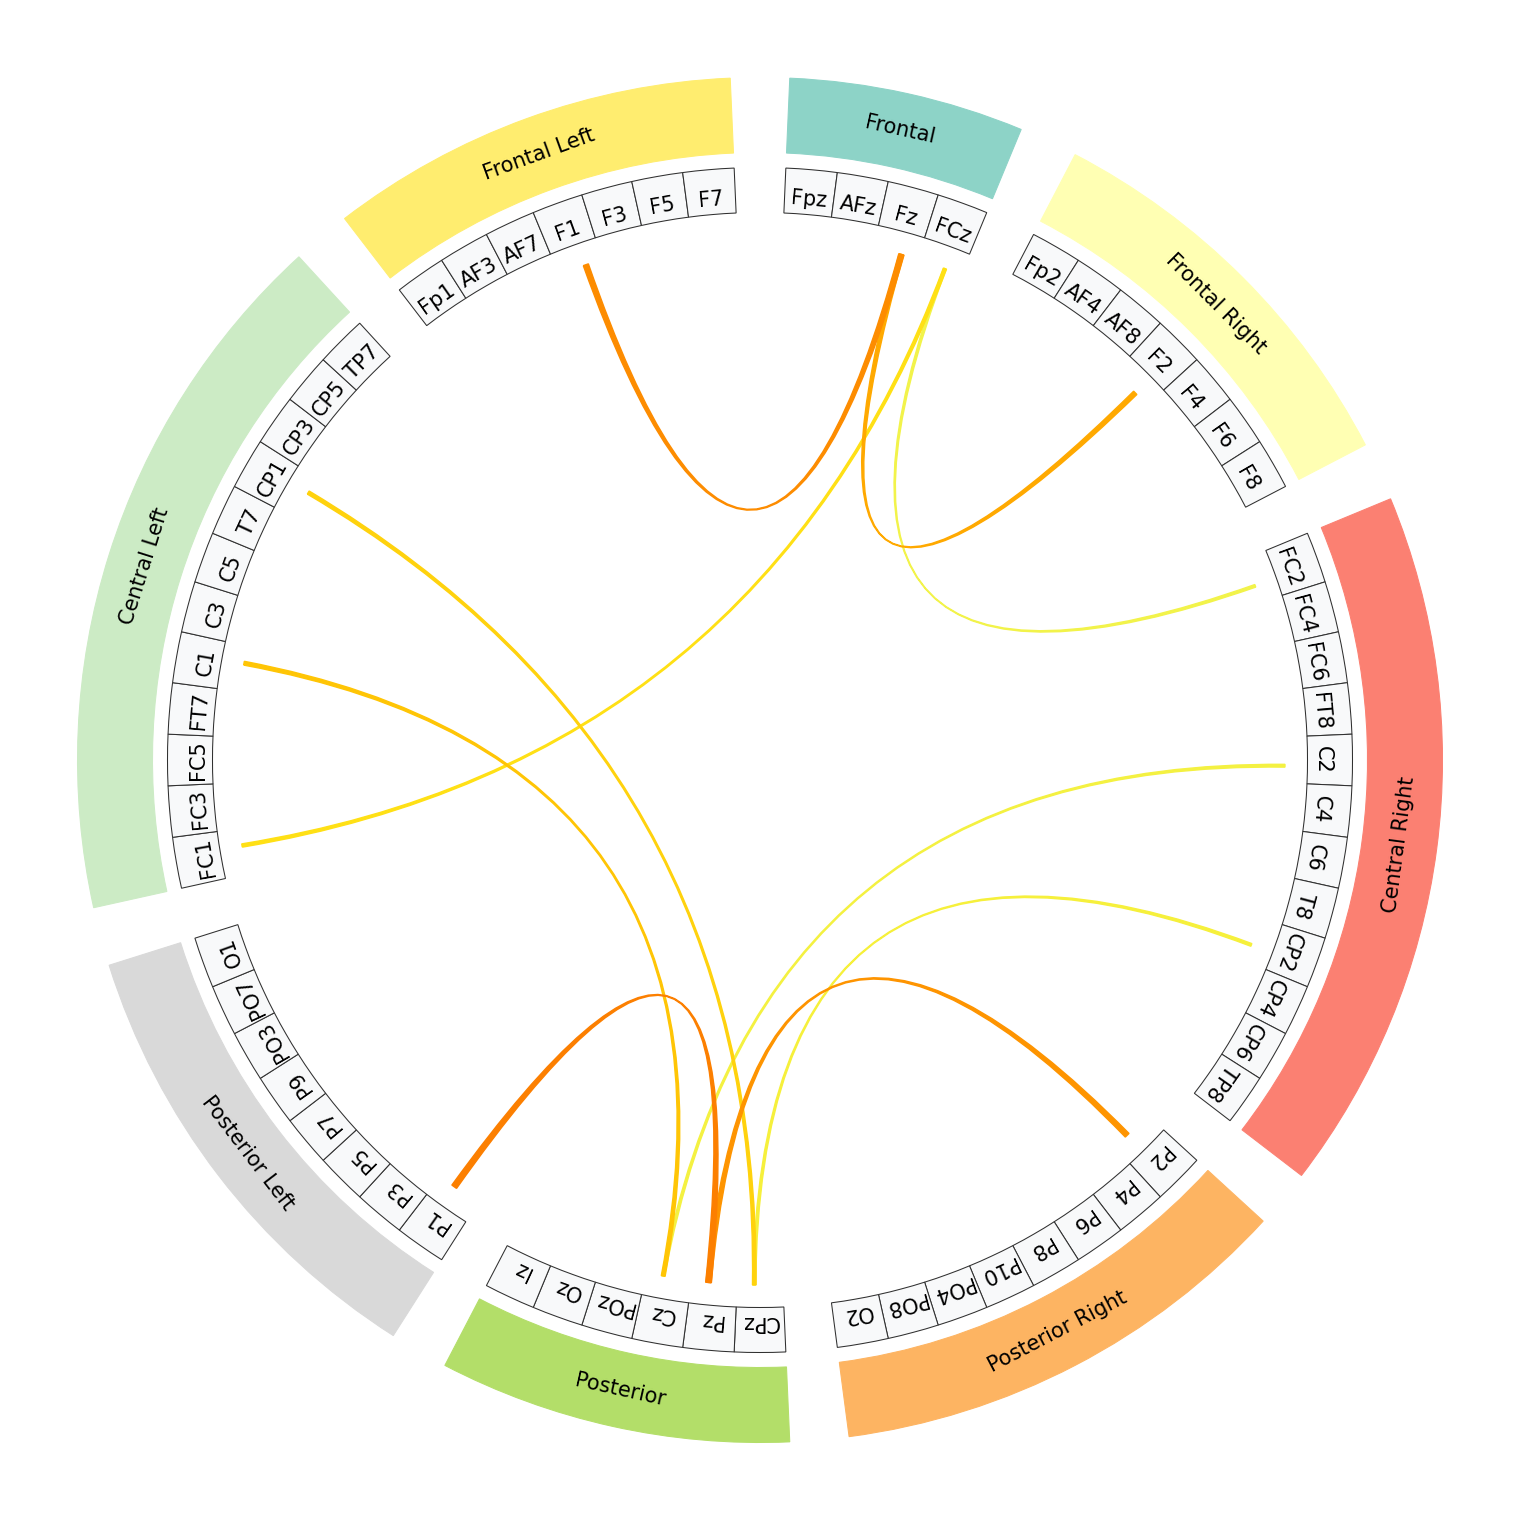

In [ ]:
conn = CircosConnectivity(
    Ctotal_2, channels, areas=areas,threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

# Sujeto 51, sujeto con peor acierto

In [ ]:
Ctotal.shape

(50, 2016, 4)

In [ ]:
Ctotal[48,:,0].shape #Puedo graficar por bandas de frecuencia Sujeto 51

(2016,)

In [ ]:
Banda1=Ctotal[48,:,0]
Banda2=Ctotal[48,:,1]
Banda3=Ctotal[48,:,2]
Banda4=Ctotal[48,:,3]

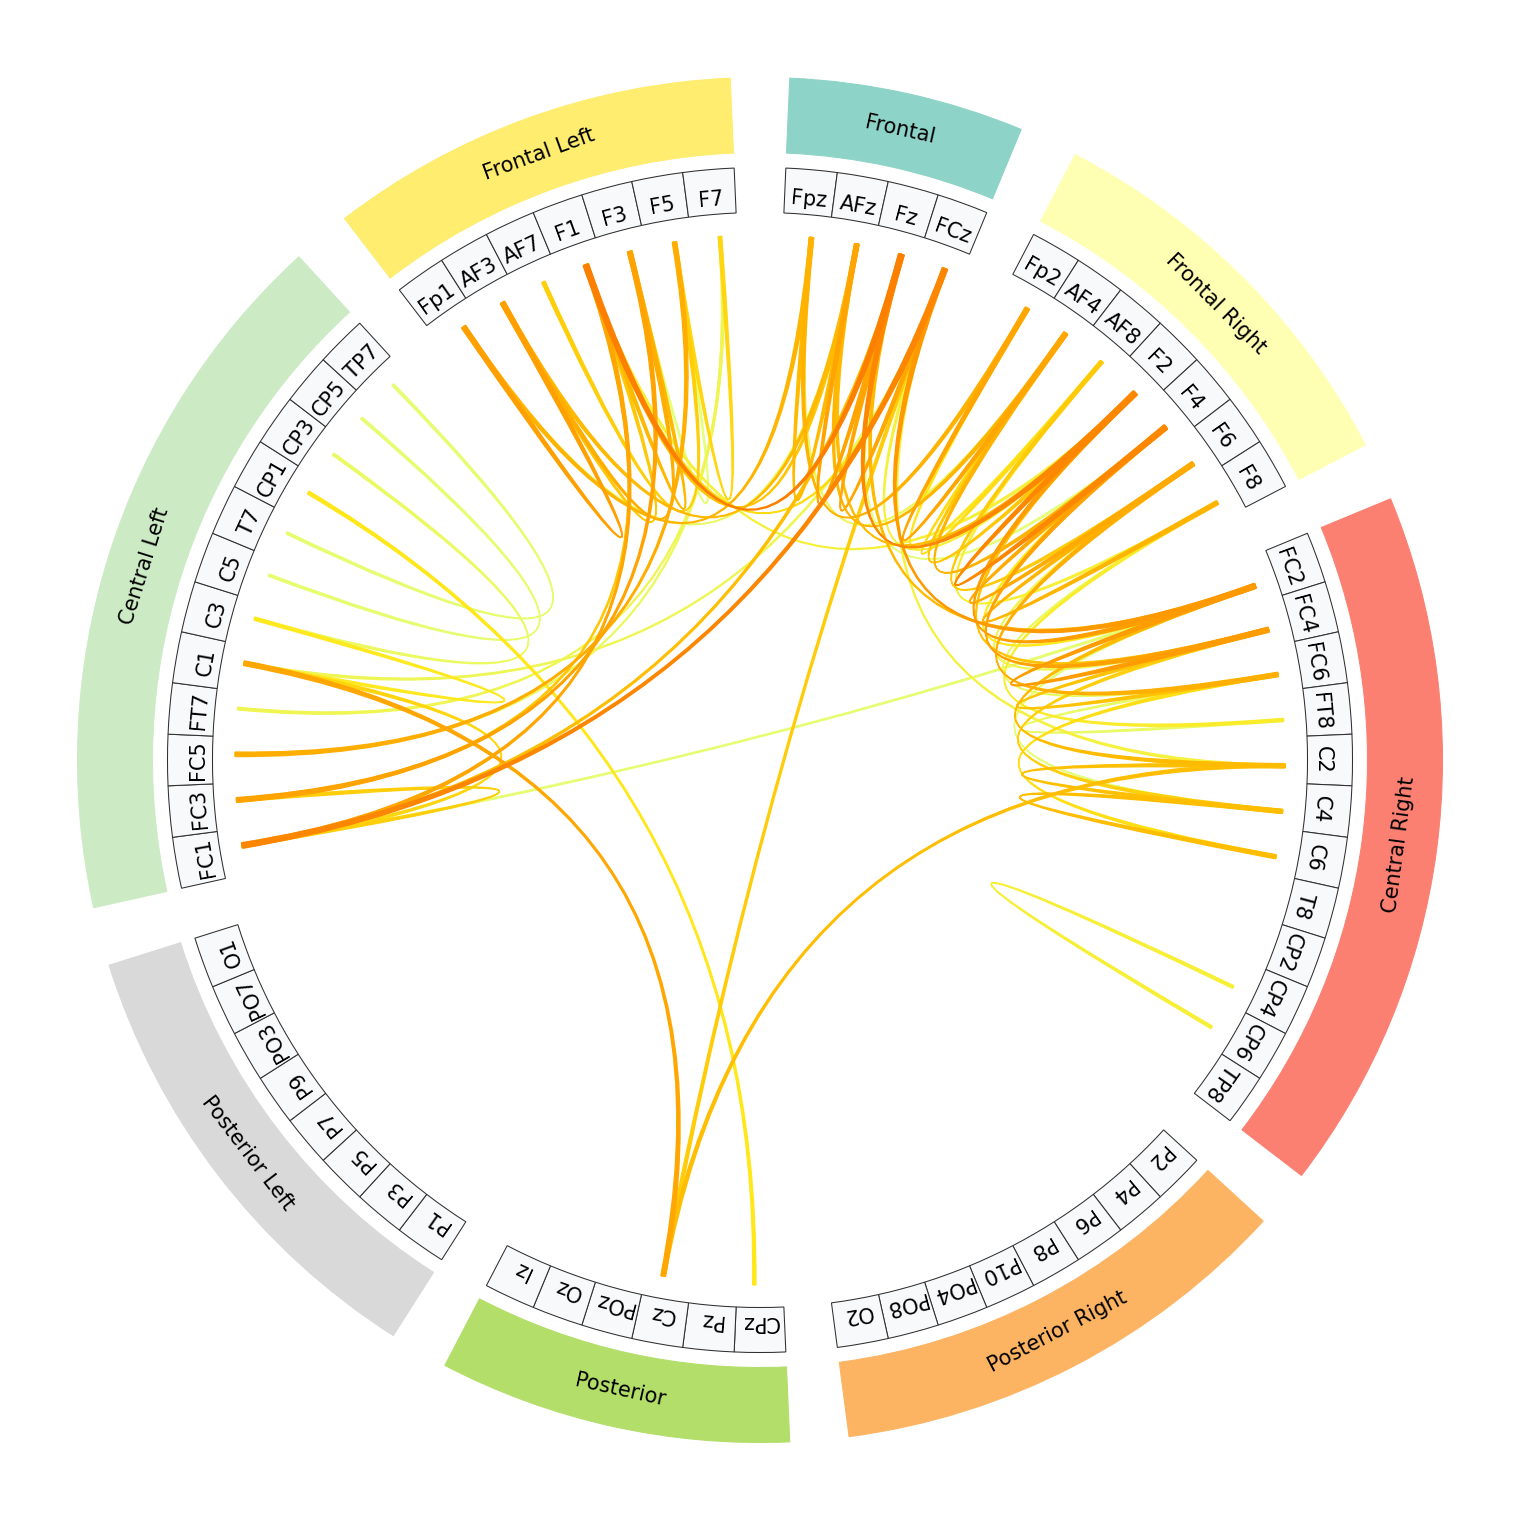

In [ ]:
conn = CircosConnectivity(
    Banda1, channels, areas=areas,threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

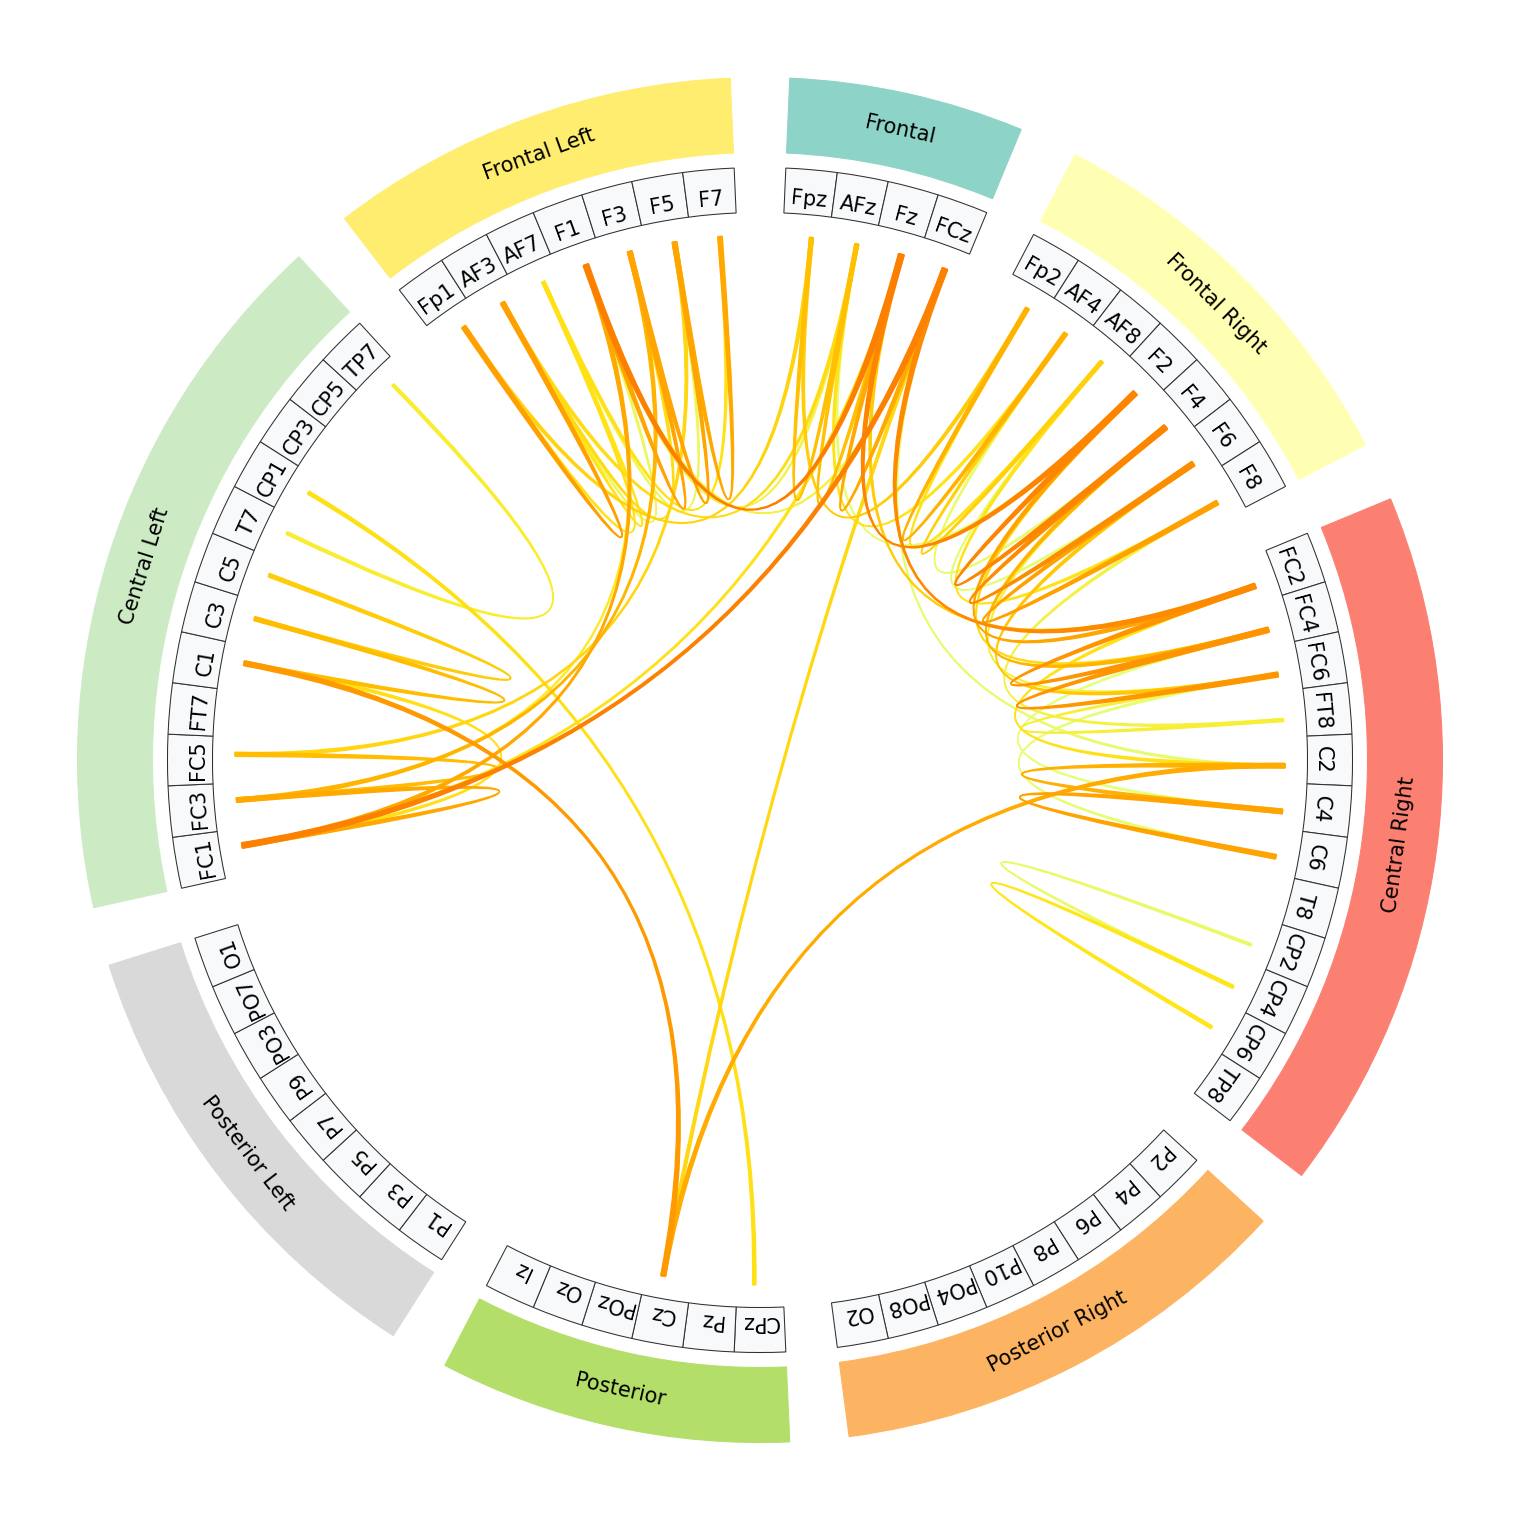

In [ ]:
conn = CircosConnectivity(
    Banda2, channels, areas=areas,threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

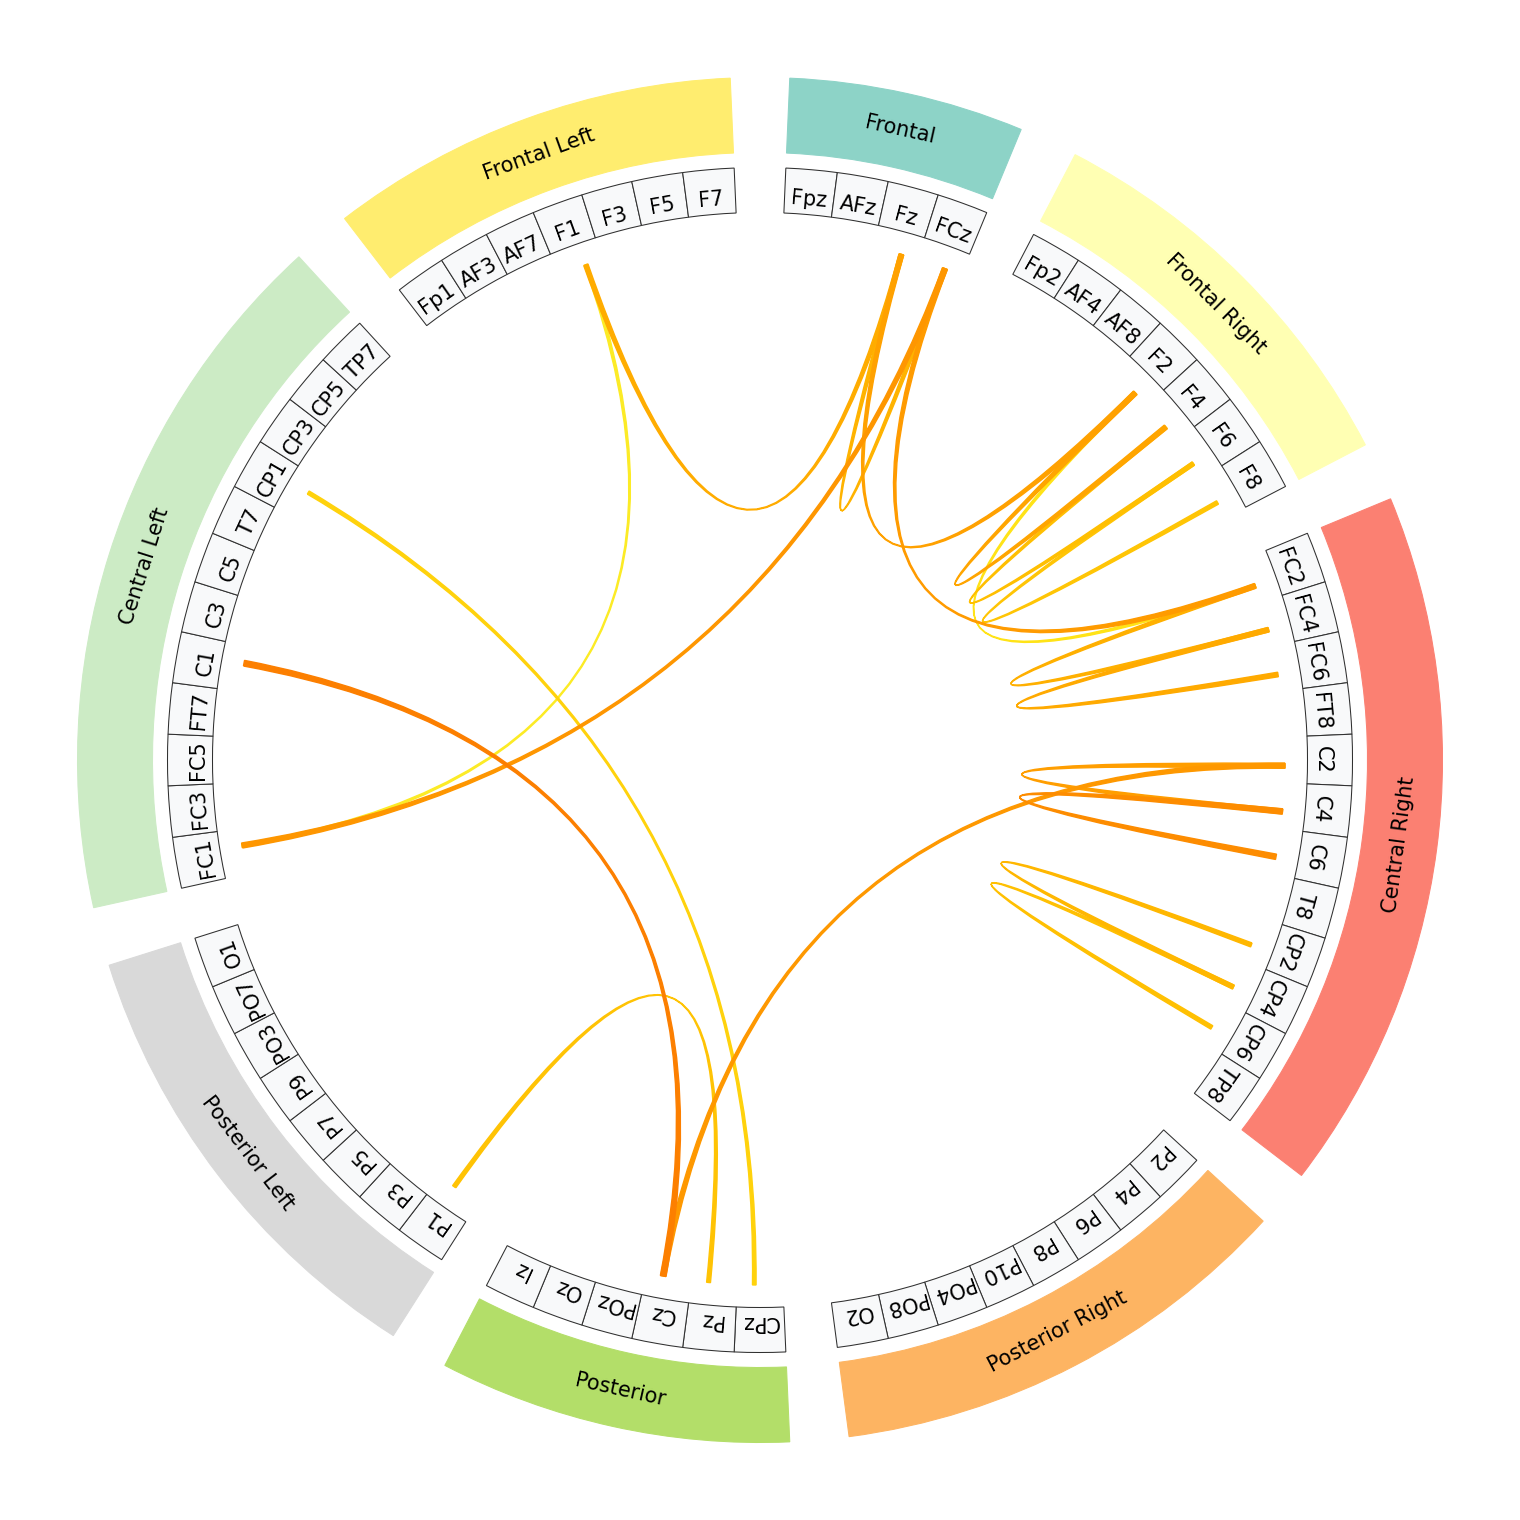

In [ ]:
conn = CircosConnectivity(
    Banda3, channels, areas=areas,threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

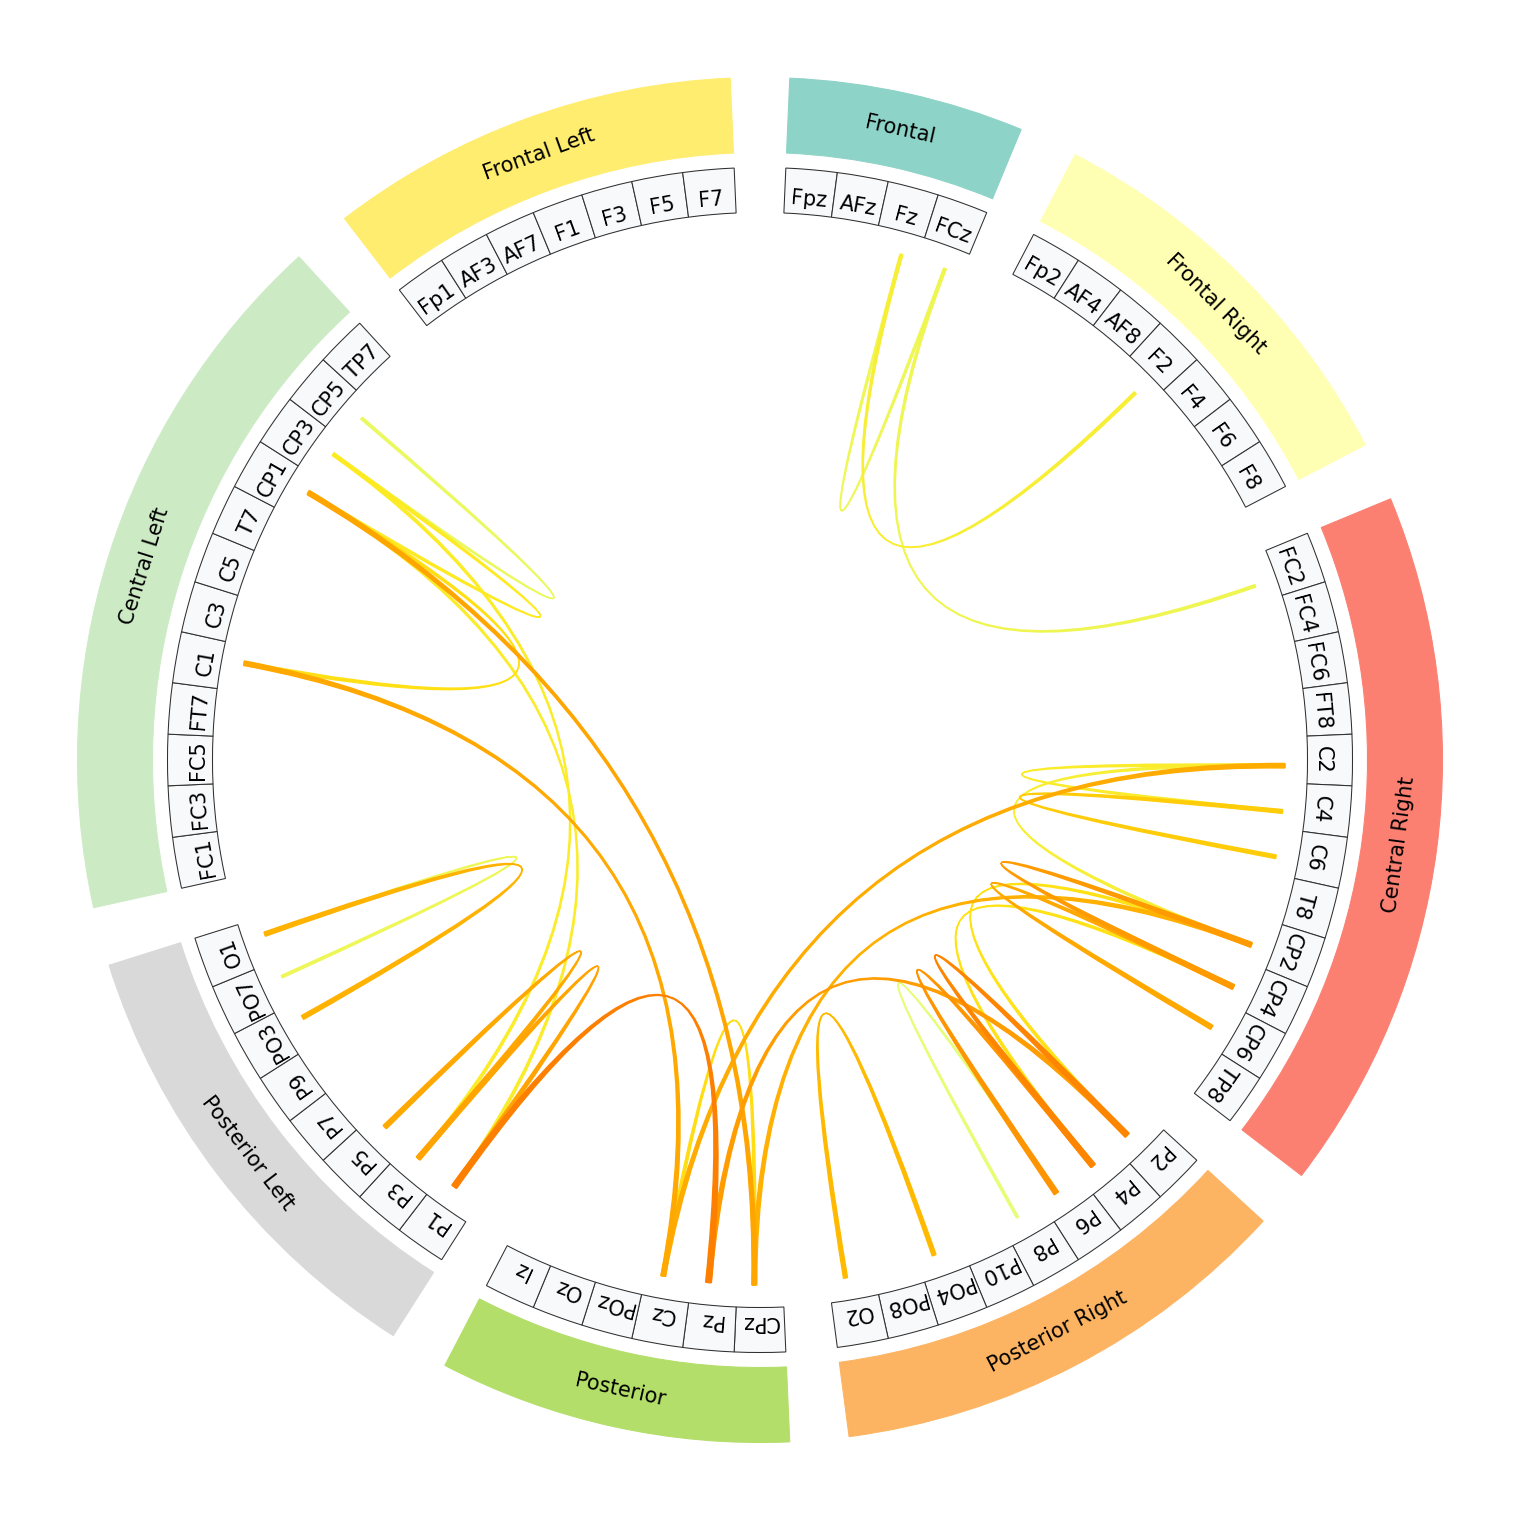

In [ ]:
conn = CircosConnectivity(
    Banda4, channels, areas=areas,threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

# Sujeto 43, sujeto con mejor acierto

In [ ]:
Ctotal[40,:,0].shape #43

(2016,)

In [ ]:
Banda43_1=Ctotal[40,:,0]
Banda43_2=Ctotal[40,:,1]
Banda43_3=Ctotal[40,:,2]
Banda43_4=Ctotal[40,:,3]

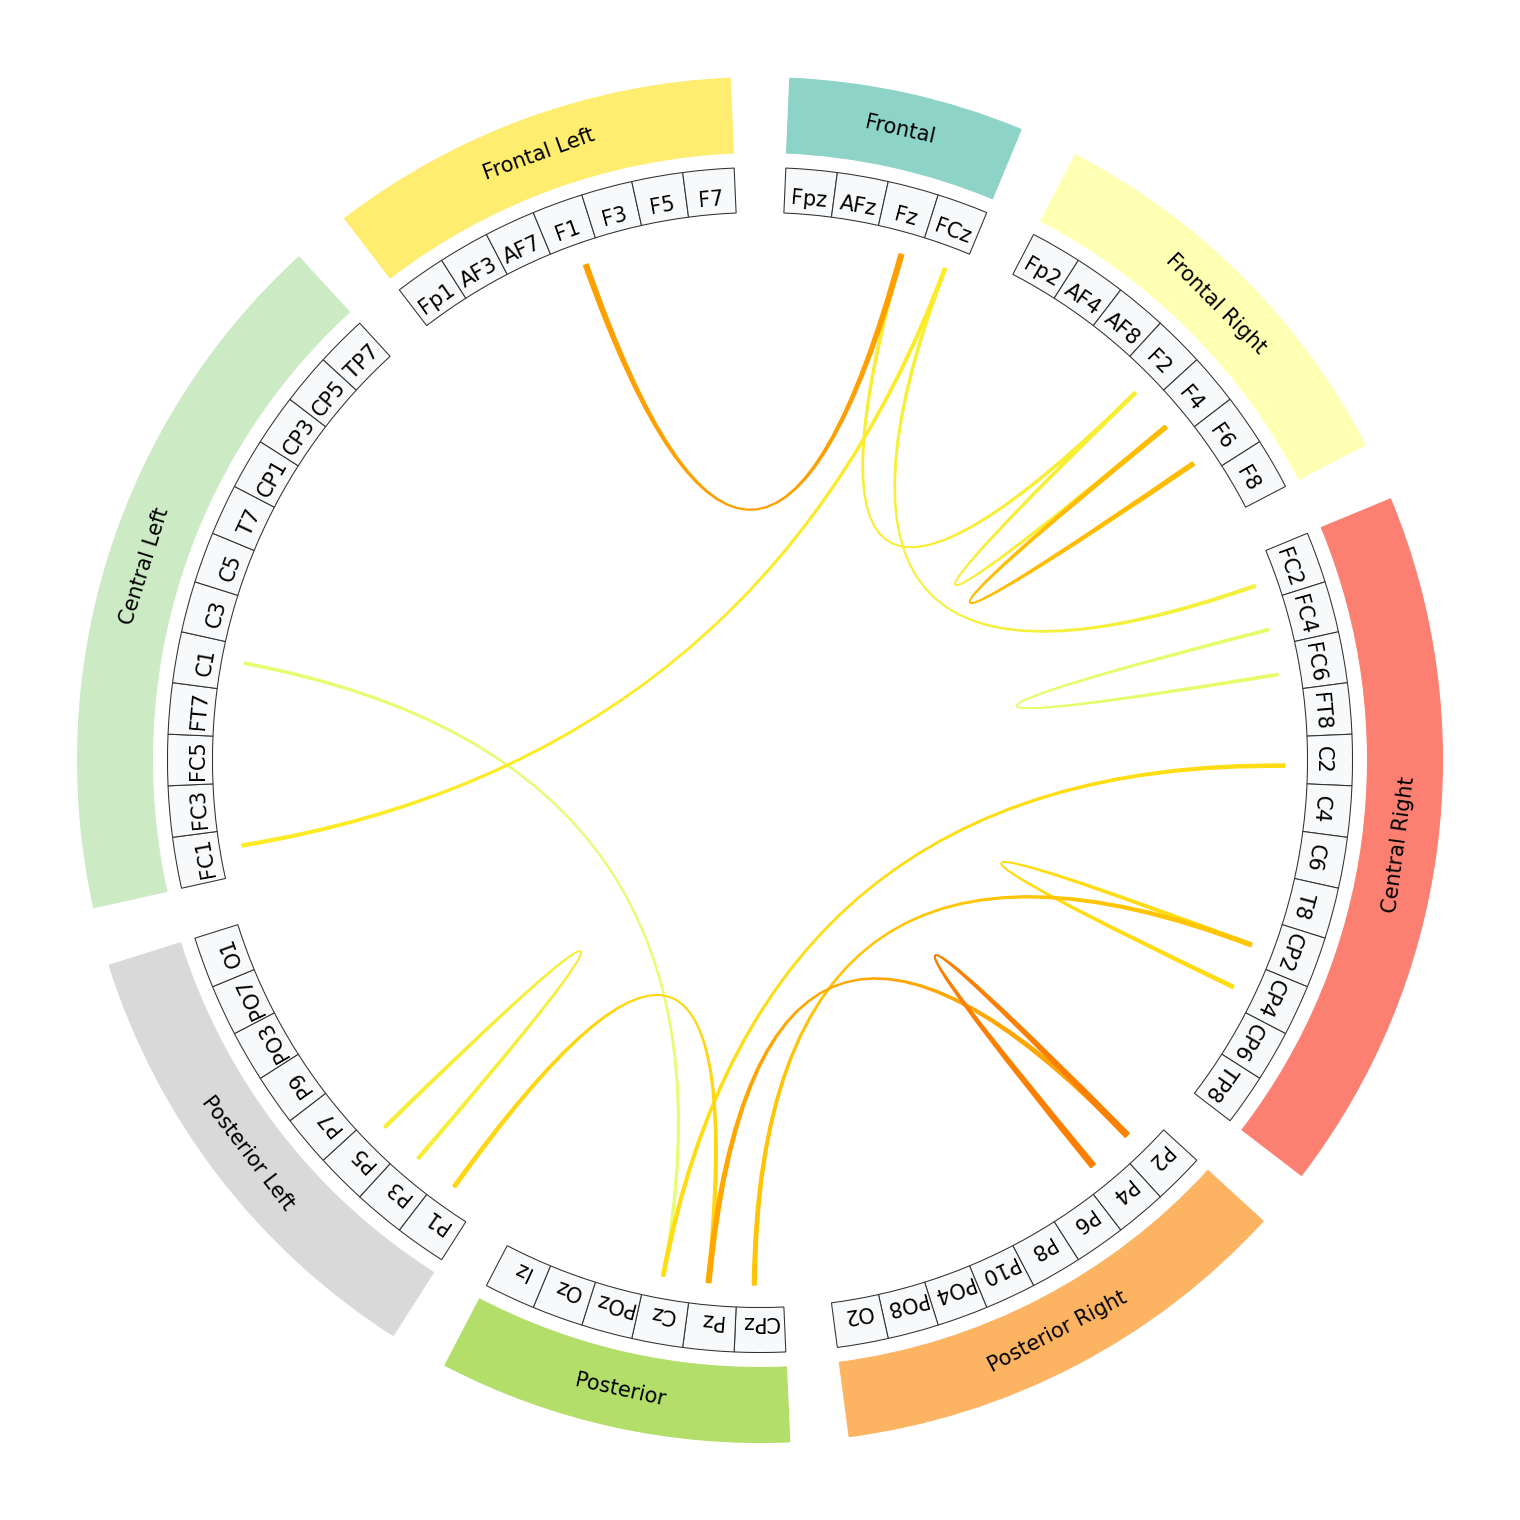

In [ ]:
conn = CircosConnectivity(
    Banda43_1, channels, areas=areas,threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

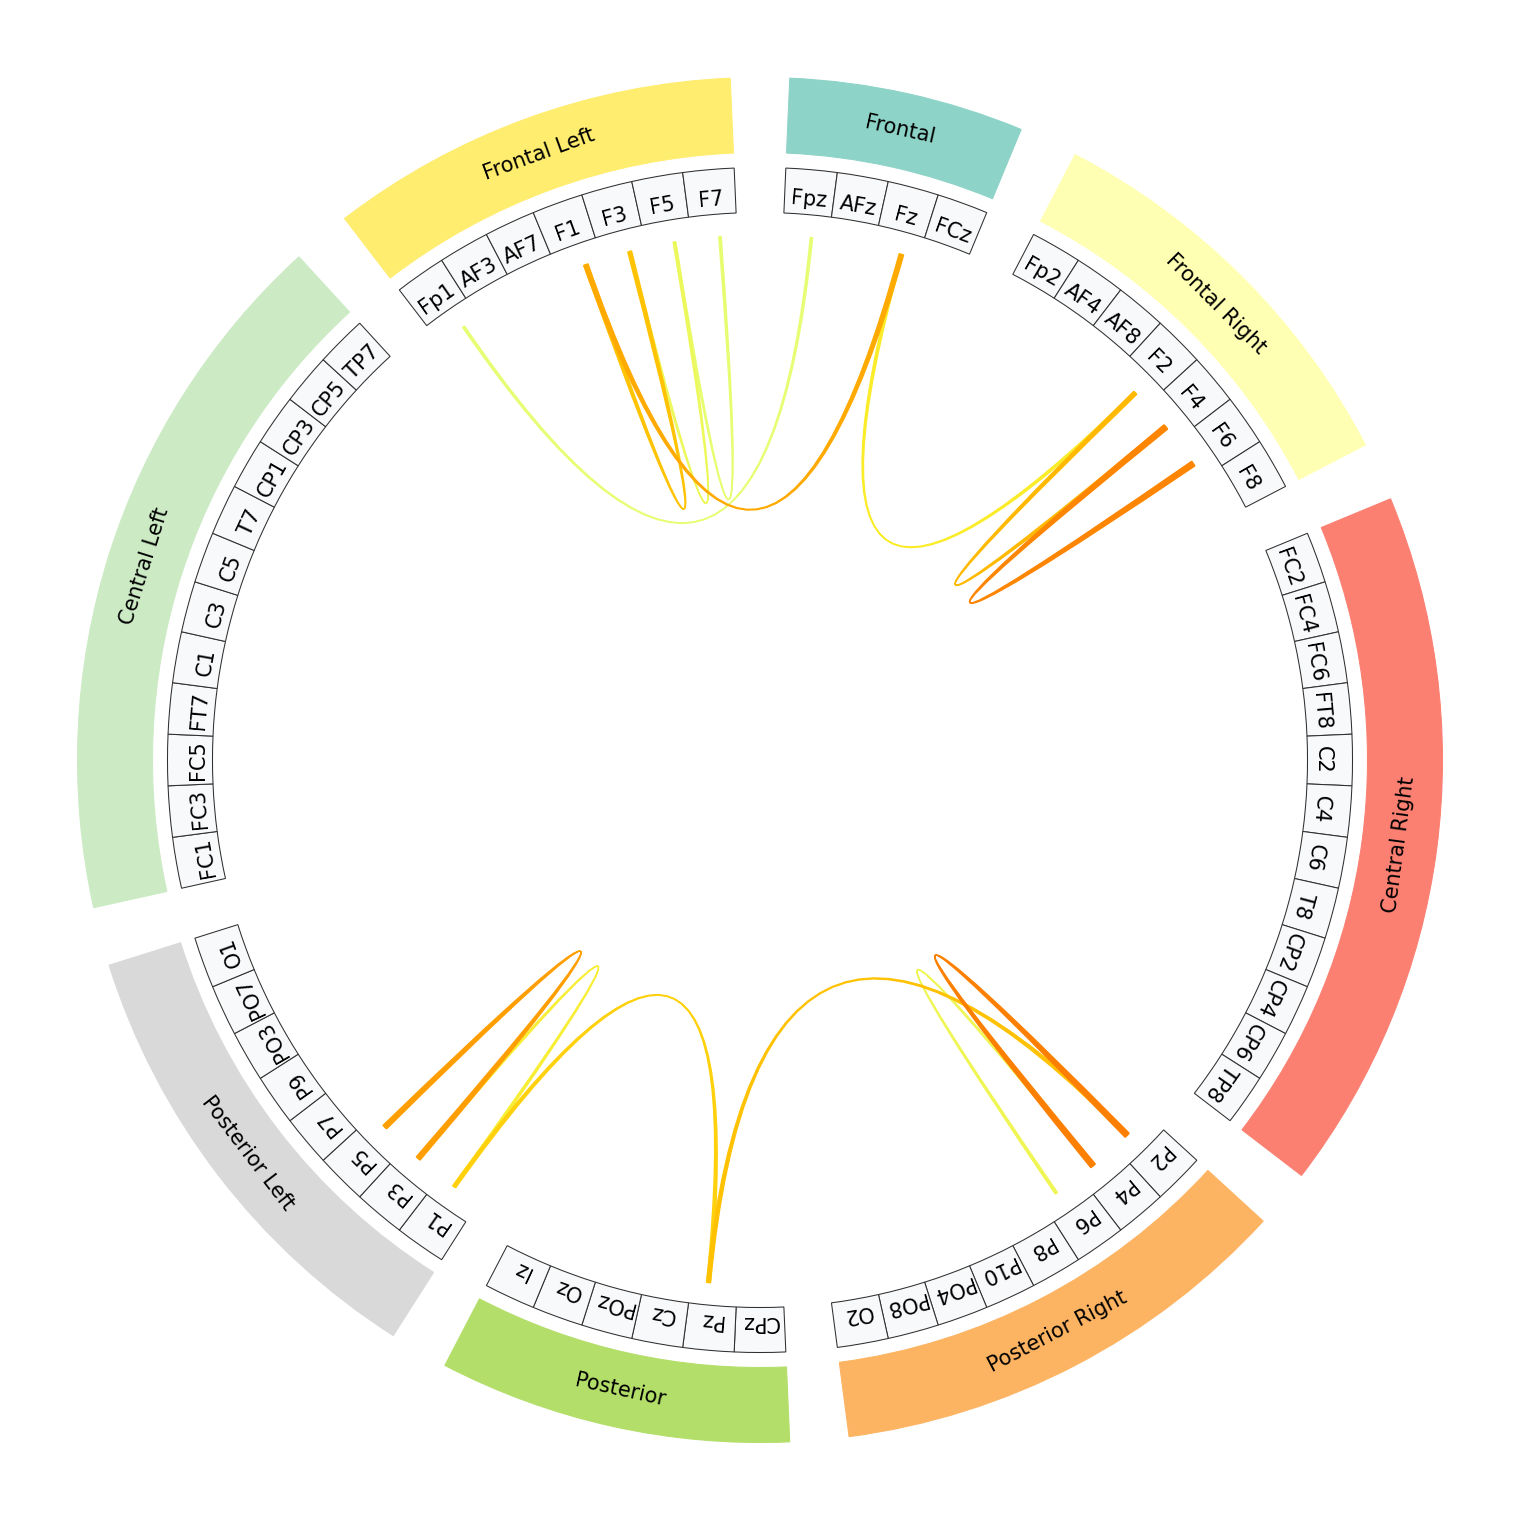

In [ ]:
conn = CircosConnectivity(
    Banda43_2, channels, areas=areas,threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

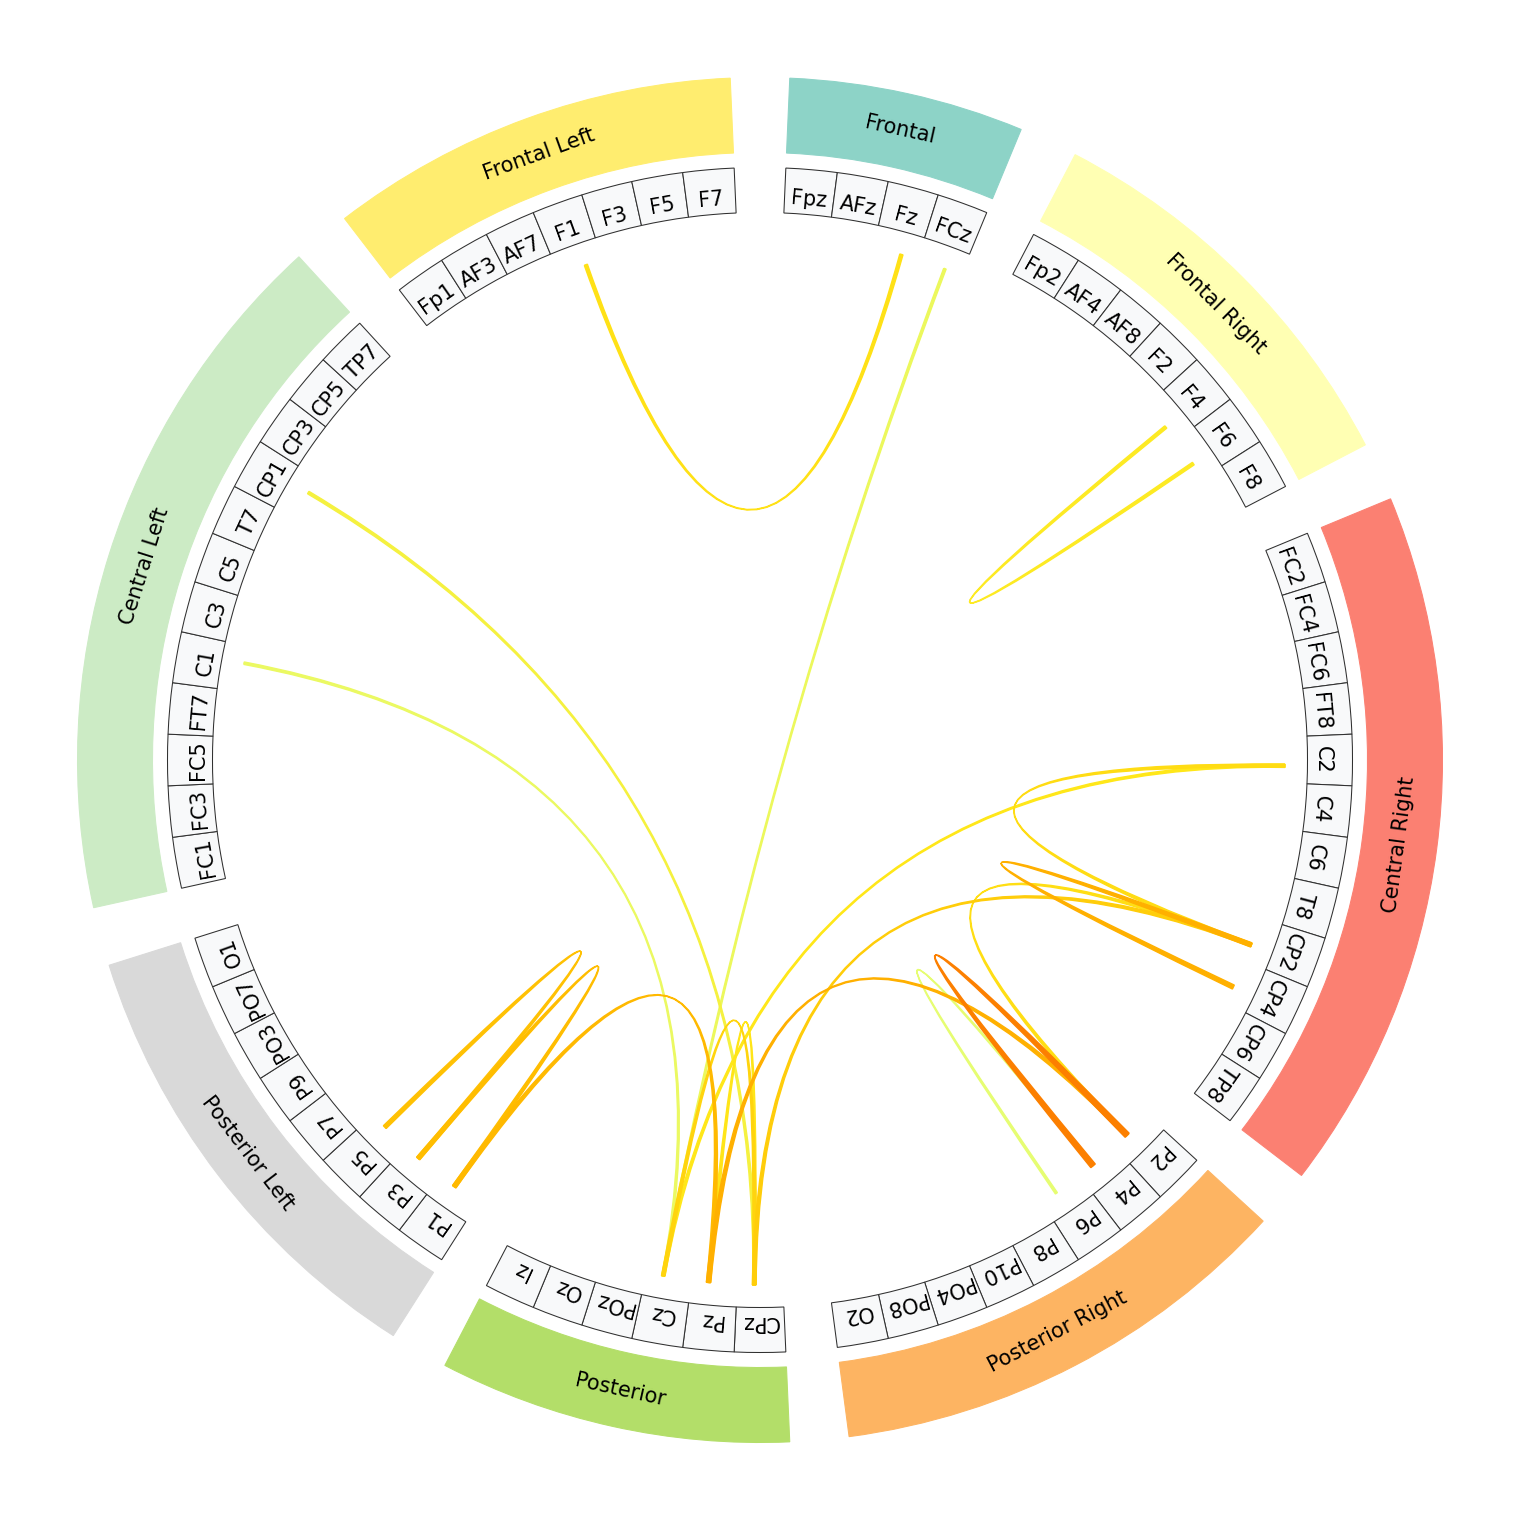

In [ ]:
conn = CircosConnectivity(
    Banda43_3, channels, areas=areas,threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

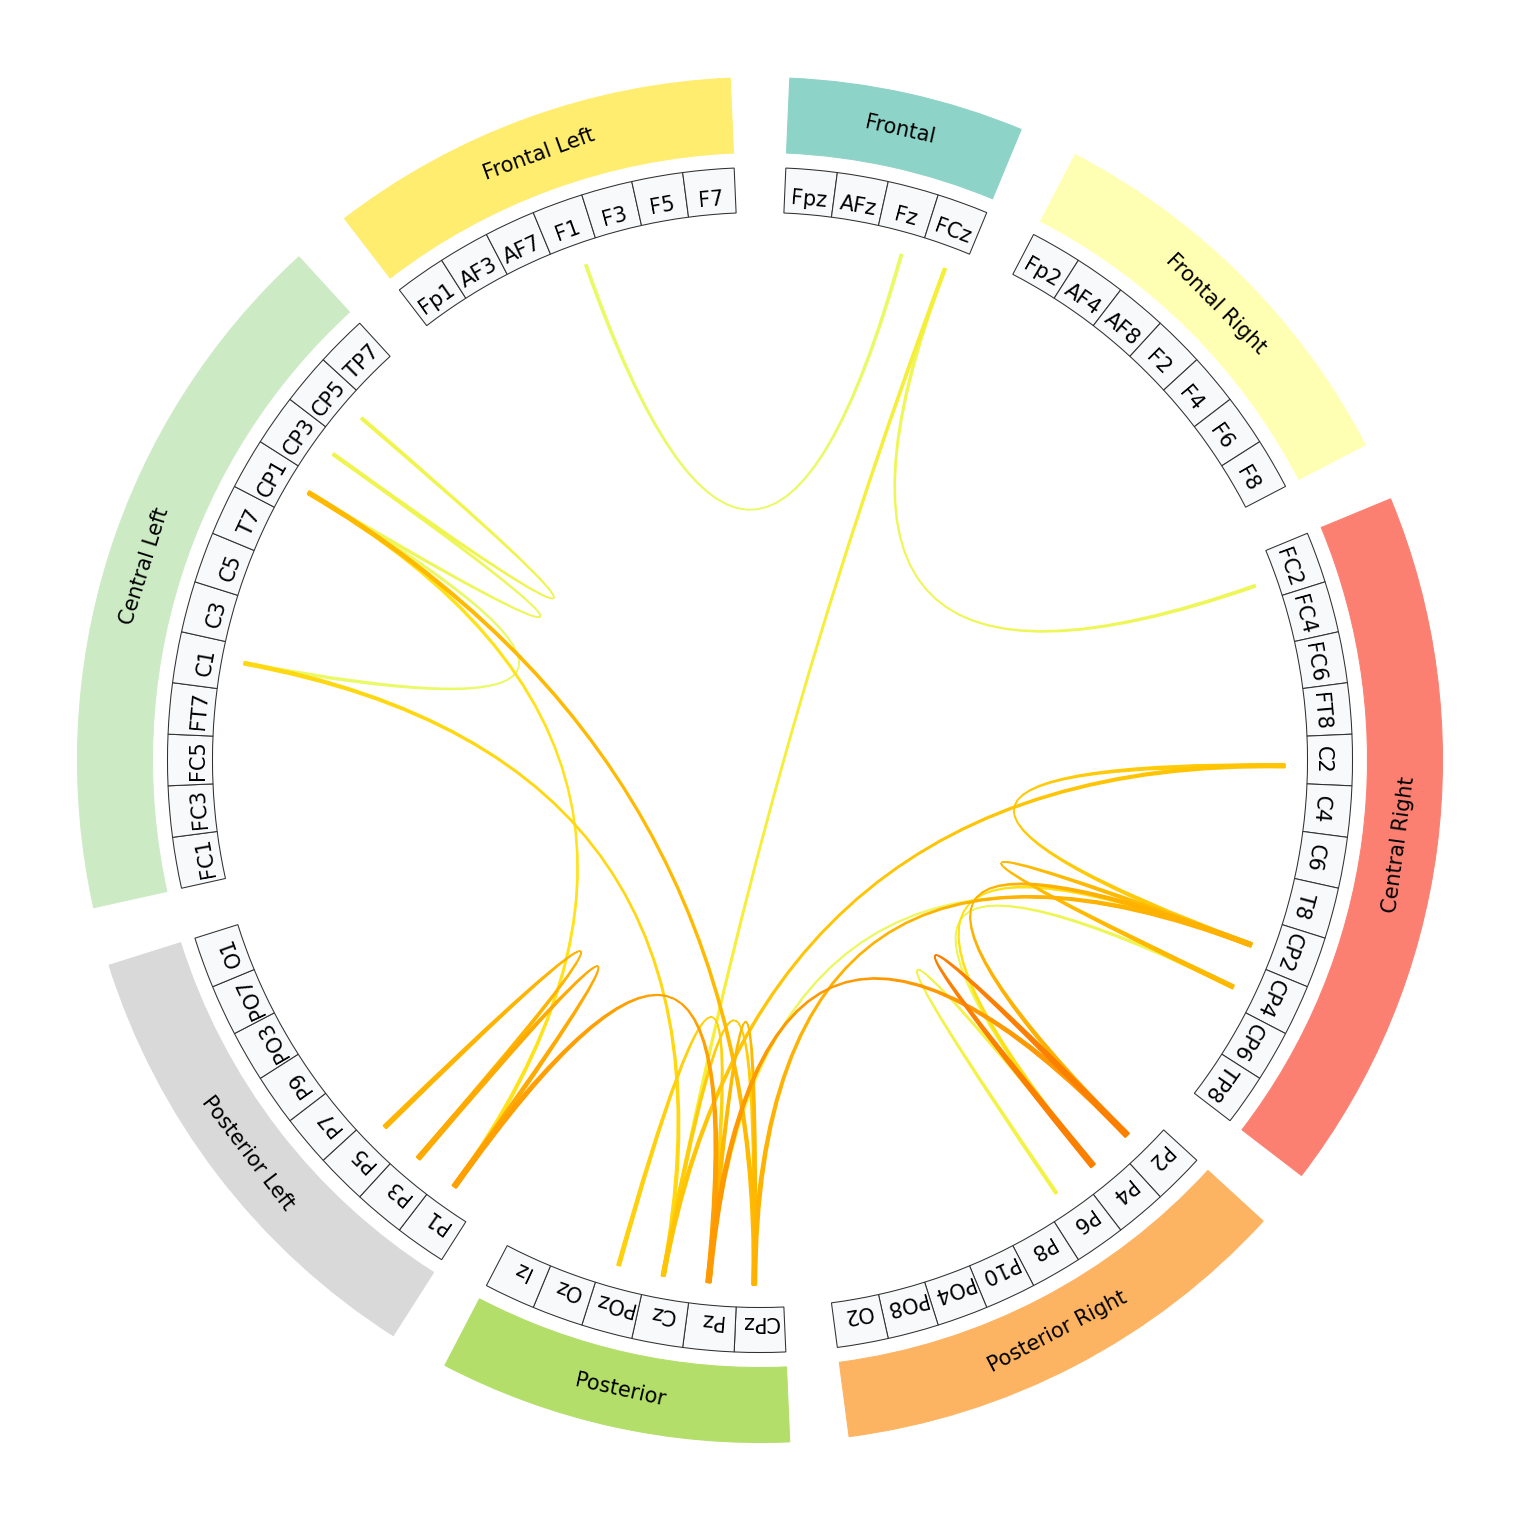

In [ ]:
conn = CircosConnectivity(
    Banda43_4, channels, areas=areas,threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;

In [ ]:
Ctotal[40,:,:].shape #43
Ctotal_43= np.mean(Ctotal[40,:,:],axis=(1))
Ctotal_43.shape

(2016,)

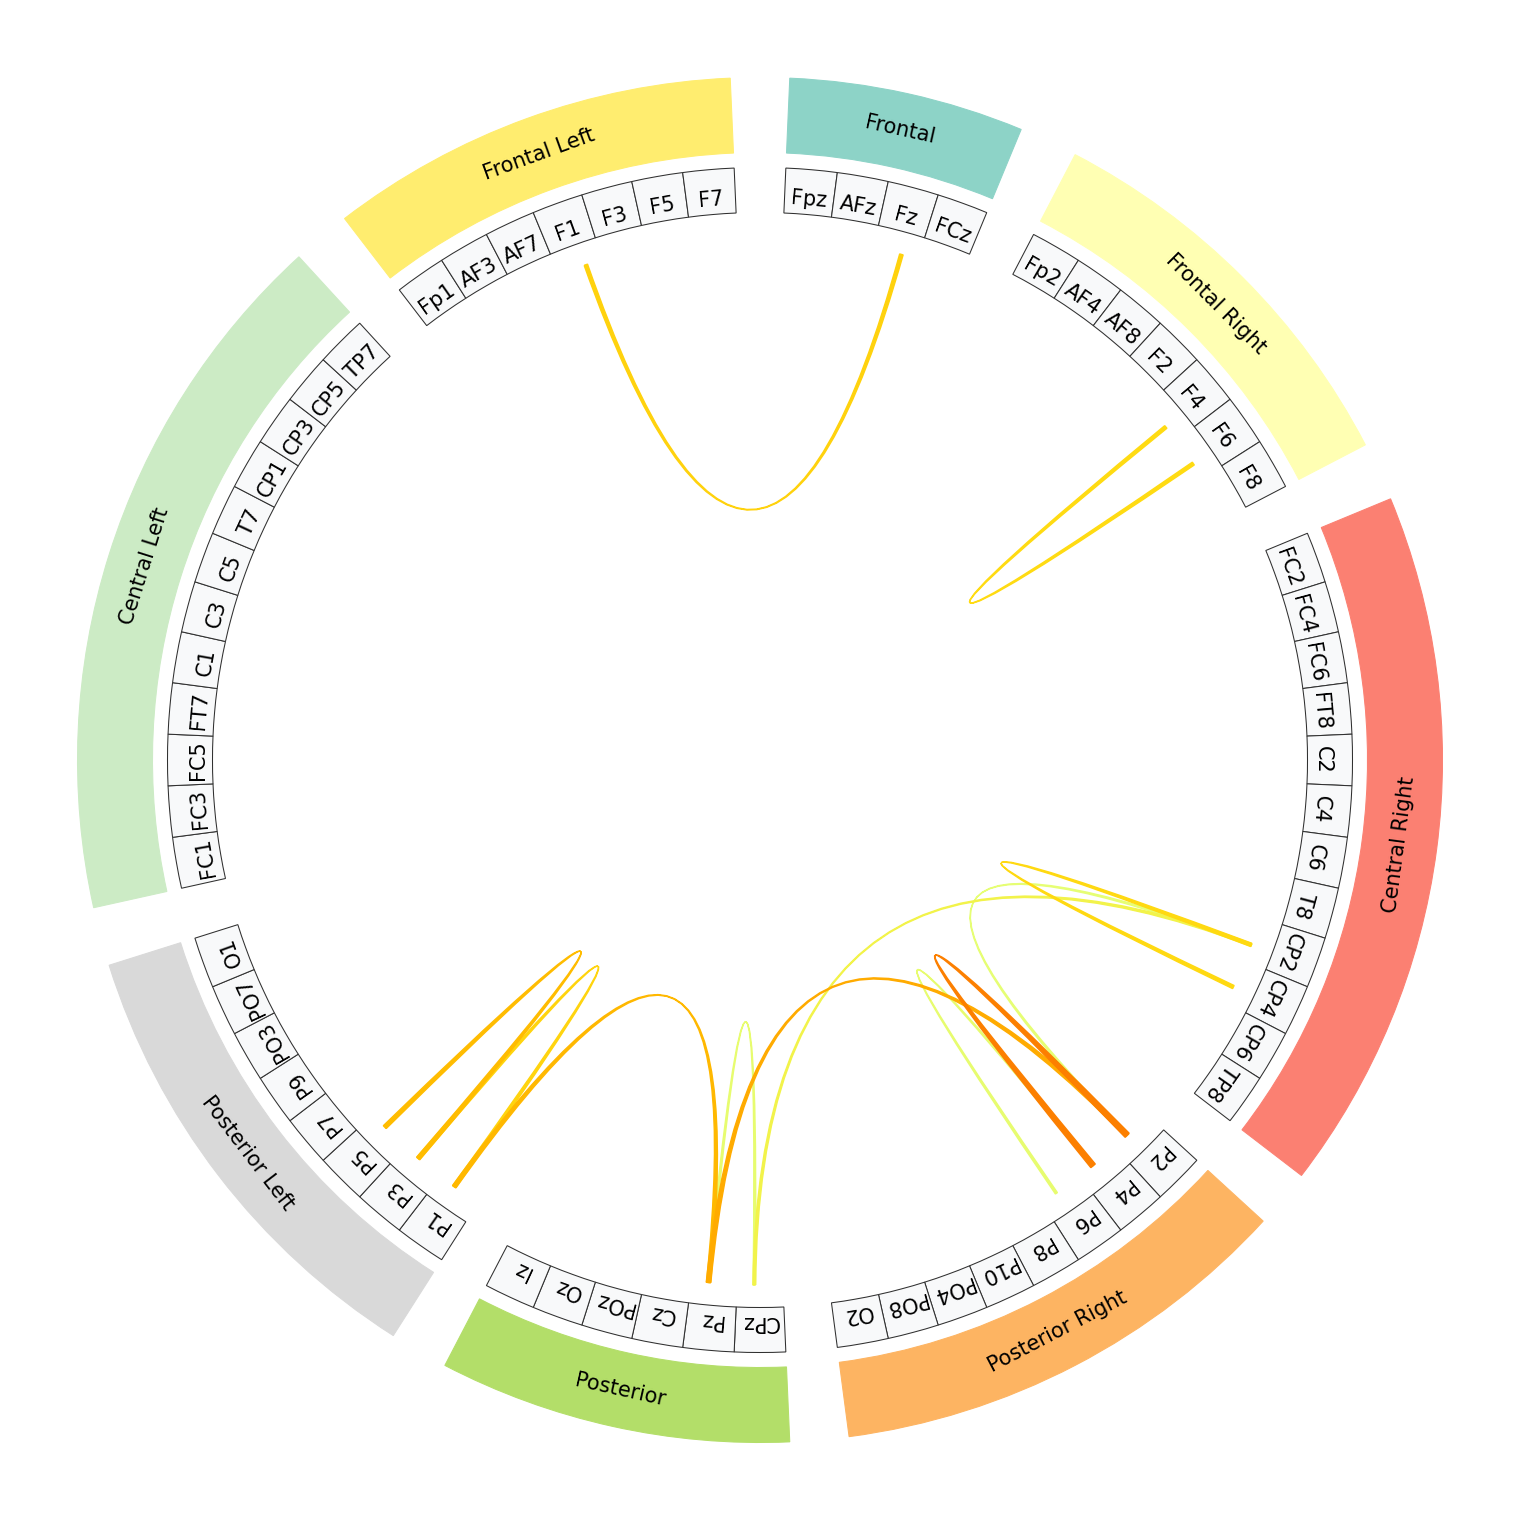

In [ ]:
conn = CircosConnectivity(
    Ctotal_43, channels, areas=areas,threshold=0.9,

    # cmaps and themes
    areas_cmap='Set3',
    arcs_cmap='Wistia',
    hemisphere_color='lightgray',
    channel_color='#f8f9fa',
    min_alpha=0,


    # Texts
    width={'hemispheres':35, 'areas':100, 'channels':60},
    text={'hemispheres':40, 'areas':20,  'channels':40},
    separation={'hemispheres':10, 'areas':-30, 'channels':5},
    labelposition={'hemispheres':60, 'areas':0, 'channels':-10},
    size=15,
    labelsize=15,


    # Shapes
    show_emisphere=False,
    arcs_separation=30,
    connection_width=0.1,
    small_separation=5,
    big_separation=10,
    offset=0,
)

conn.figure;